In [1]:
import torch
import gpytorch
import numpy as np
import pandas as pd
import scipy.optimize as optimize


from bo_functions import ExactGPModel
from bo_functions import bo_iter
from bo_functions import calc_y_exp
from bo_functions import create_y_data
from bo_plotters import plot_xy
from bo_plotters import y_plotter
from bo_plotters import stdev_plotter
from bo_plotters import ei_plotter

In [2]:
#Pull x data from CSV
Theta_True = np.array([1,-1])
noise_std = 0.1**2
q = 2

exp_data_doc = "exp_data.csv"
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1]
Yexp = exp_data[:,2]
n = len(Xexp)
# print(x)

In [3]:
#Pull training data from CSV
train_data_doc = "train_2_in_data.csv"
train_data = np.array(pd.read_csv(train_data_doc, header=0,sep=","))
train_T = torch.tensor(train_data[:,1:3])
train_sse = torch.tensor(train_data[:,3])
# print(train_sse)

In [4]:
#Reduce Number of Training Points
t =len(train_T) #Desired number of training points
t = 3 #Set t=5 to show changing EI
train_T = train_T[0:t]
train_sse = train_sse[0:t]

In [5]:
#Define GP Testing space
#Define Testing Space
p=20
Theta1 =  np.linspace(0.5,1.5,p) #1x10
Theta2 =  np.linspace(-1.5,-0.5,p) #1x10
# Theta1 =  np.linspace(-2,2,p) #1x10
# Theta2 =  np.linspace(-2,2,p) #1x10
theta_mesh = np.array(np.meshgrid(Theta1, Theta2)) #2 Uniform 5x5 arrays
theta1_mesh = theta_mesh[0]
theta2_mesh = theta_mesh[1]
# print(theta_mesh)

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/gpytorch/lazy/lazy_tensor.py:1741: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  Linv = torch.triangular_solve(Eye, L, upper=False).solution


Scipy Theta Best =  [ 1.19299959 -1.5       ]
Argmax Theta Best =  [ 1.18421053 -1.5       ]
Scipy Theta Opt =  [ 1.19299959 -1.5       ]
Argmin Theta_Opt_GP =  [ 1.18421053 -1.5       ] 



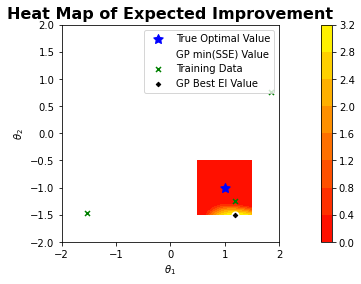

Scipy Theta Best =  [ 1.19299959 -1.5       ]
Argmax Theta Best =  [ 1.18421053 -1.5       ]
Scipy Theta Opt =  [ 1.19299959 -1.5       ]
Argmin Theta_Opt_GP =  [ 1.18421053 -1.5       ] 



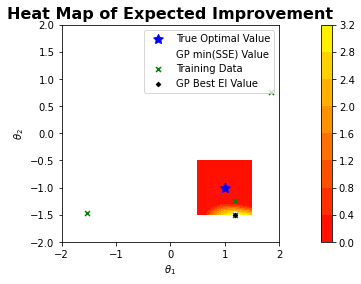

Scipy Theta Best =  [ 1.19299959 -1.5       ]
Argmax Theta Best =  [ 1.18421053 -1.5       ]
Scipy Theta Opt =  [ 1.19299959 -1.5       ]
Argmin Theta_Opt_GP =  [ 1.18421053 -1.5       ] 



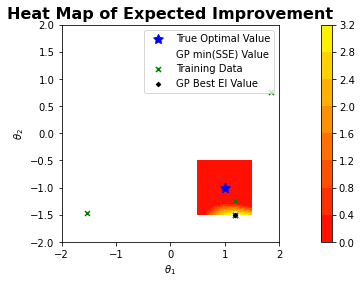

(array([ 1.19299959, -1.5       ]), array([ 1.19299959, -1.5       ]))


In [6]:
from bo_functions import bo_iter
iterations = 300
explore_bias = 0.1
verbose = True
BO_iters = 3

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_T, train_sse, likelihood)

BO_Results =  bo_iter(BO_iters, train_T, train_sse, p,q, theta_mesh, Theta_True, iterations, explore_bias, model, likelihood, Xexp, Yexp, verbose)
print(BO_Results)

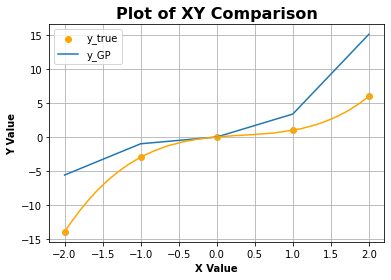

Magnitude of SSE given Theta_Opt =  [ 1.19299959 -1.5       ] is 164.409


In [7]:
q_y = 3
y_GP_input = np.zeros((n,3))
for j in range(n):
    y_GP_input[j] = np.array([BO_Results[0][0],BO_Results[0][0],Xexp[j]])

noise_std = 0.01
X_line = np.linspace(-2,2,100)
y_true = calc_y_exp(Theta_True, X_line, noise_std, noise_mean=0)

y_GP_Opt = create_y_data(q_y,y_GP_input)

title = "XY Comparison"
plot_xy(X_line,Xexp, Yexp, y_GP_Opt,y_true,title)

Error_mag = np.sum((y_GP_Opt-Yexp)**2)
print("Magnitude of SSE given Theta_Opt = ",BO_Results[1], "is", np.round(Error_mag,3))